In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.metrics import r2_score
import glob

In [5]:
data = pd.read_csv('D:\KNEE\\freq1.csv')
data = data[data['Freq of bouts']>30]
singular_data = data.groupby('Subject ID ').mean()
ids = singular_data.index.values

In [6]:
A_Files = glob.glob('D:\\KNEE\\[0-9]?[A]*bin.npy')
B_Files = glob.glob('D:\\KNEE\\[0-9]?[B]*bin.npy')
C_Files = glob.glob('D:\\KNEE\\[0-9]?[C]*bin.npy')

C = np.array([np.load(x, allow_pickle = True) for x in C_Files])
B = np.array([np.load(x, allow_pickle = True) for x in B_Files])
A = np.array([np.load(x, allow_pickle = True) for x in A_Files])


In [70]:
X_dur = [y[1][2] for y in A]
X_Vol = [y[1][3] for y in A]
X_Int = [y[1][4] for y in A]

K_dur =[[np.sum(Z[Z>i])/np.sum(Z) for i in np.arange(3000)] for Z in X_dur]
K_Vol =[[np.sum(Z[Z>i])/np.sum(Z) for i in np.arange(1500)] for Z in X_Vol]
K_Int =[[np.sum(Z[Z>i])/np.sum(Z) for i in np.arange(0,0.5, 0.01)] for Z in X_Int]



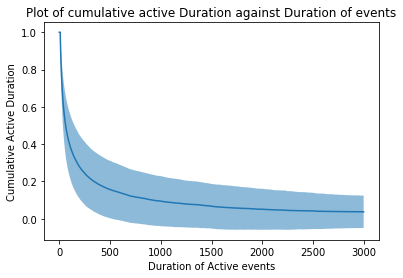

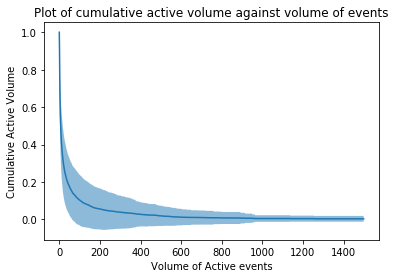

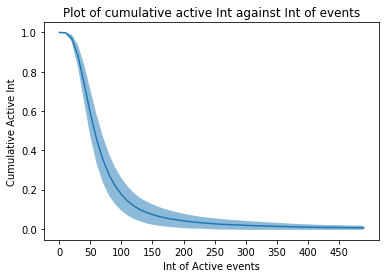

In [71]:
plt.plot(np.arange(3000), np.mean(K_dur, 0))
plt.fill_between(np.arange(3000),np.mean(K_dur, 0)-np.std(K_dur, 0) ,np.mean(K_dur, 0)+np.std(K_dur, 0) , alpha = 0.5)
plt.ylabel('Cumulative Active Duration')
plt.xlabel('Duration of Active events')
plt.title('Plot of cumulative active Duration against Duration of events')
plt.show()

plt.plot(np.arange(1500), np.mean(K_Vol, 0))
plt.fill_between(np.arange(1500),np.mean(K_Vol, 0)-np.std(K_Vol, 0) ,np.mean(K_Vol, 0)+np.std(K_Vol, 0) , alpha = 0.5)
plt.ylabel('Cumulative Active Volume')
plt.xlabel('Volume of Active events')
plt.title('Plot of cumulative active volume against volume of events')
plt.show()


plt.plot(np.arange(50), np.mean(K_Int, 0))
plt.fill_between(np.arange(50),np.mean(K_Int, 0)-np.std(K_Int, 0) ,np.mean(K_Int, 0)+np.std(K_Int, 0) , alpha = 0.5)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], ('0', '50', '100','150', '200', '250', '300','350', '400', '450'))
plt.ylabel('Cumulative Active Int')
plt.xlabel('Int of Active events')
plt.title('Plot of cumulative active Int against Int of events')
plt.show()

